## COVID - 19
Coronavirus is a pandemic which started in China. It is caused by a virus that spread from person to person. Symptoms ranges from mild to severe illness.
You can become infected by coming into close contact (about 6 feet or two
arm lengths) with a person who has COVID-19. COVID-19 is primarily spread
from person to person.
You can become infected from respiratory droplets when an infected person coughs,sneezes, or talks.
You may also get it by touching a surface or object that has the virus on it, and then by touching your mouth, nose, or eyes.
The European Center for Diseases Prevention and Control(ECDC) collects data on the geographic distribution of COVID-19 cases worldwide

In [53]:
from IPython.display import Image
from IPython.core.display import HTML 

In [90]:
Image(url= "https://www.insidescience.org/sites/default/files/sites/default/files/images/articles/top-images/2020/coronavirus.jpg")

## ECDC COVID-19 data collection
ECDC collects covid-19 data worldwide on dily bases. My analysis will be based on data up to July 25, 2020.
Dataset website : https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
Link to dataset: https://opendata.ecdc.europa.eu/covid19/casedistribution/csv

In [57]:
#LIbaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [60]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,31/07/2020,31,7,2020,71,0,Afghanistan,AF,AFG,38041757.0,Asia,3.869432
1,30/07/2020,30,7,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,3.882576
2,29/07/2020,29,7,2020,103,1,Afghanistan,AF,AFG,38041757.0,Asia,4.550263
3,28/07/2020,28,7,2020,105,1,Afghanistan,AF,AFG,38041757.0,Asia,5.028685
4,27/07/2020,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187


## Exploratory analysis

Exploratory Data Analysis(EAD) refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to spot hypothesis, and to check assumptions with the help of summary statistics and graphical representations

In [61]:
#Summary of my dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33268 entries, 0 to 33267
Data columns (total 12 columns):
dateRep                                                       33268 non-null object
day                                                           33268 non-null int64
month                                                         33268 non-null int64
year                                                          33268 non-null int64
cases                                                         33268 non-null int64
deaths                                                        33268 non-null int64
countriesAndTerritories                                       33268 non-null object
geoId                                                         33129 non-null object
countryterritoryCode                                          33204 non-null object
popData2019                                                   33204 non-null float64
continentExp                                           

In [62]:
#Missing values 
df.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          139
countryterritoryCode                                            64
popData2019                                                     64
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2781
dtype: int64

In [63]:
#Shape of dataframe
df.shape

(33268, 12)

In [64]:
#Generating summary statistics, excluding NaN values.
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,33268.000000,33268.000000,33268.000000,33268.00000,33268.000000,3.320400e+04,30487.000000
mean,16.251834,4.751773,2019.997986,519.90811,20.238367,4.481418e+07,25.407635
std,8.824015,1.781983,0.044832,3244.09478,122.663291,1.626403e+08,64.684412
min,1.000000,1.000000,2019.000000,-2461.00000,-1918.000000,8.150000e+02,-1.262589
25%,9.000000,4.000000,2020.000000,0.00000,0.000000,1.641164e+06,0.168642
50%,17.000000,5.000000,2020.000000,5.00000,0.000000,8.544527e+06,3.068131
75%,24.000000,6.000000,2020.000000,99.00000,2.000000,3.041786e+07,17.890745
max,31.000000,12.000000,2020.000000,78427.00000,4928.000000,1.433784e+09,885.924117


## Visulaization
This inolves understanding my datasets by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed.

I will do my analysis using 9 different countries from all the continents in the world and how cvid-19 has impacted these countries and continents

In [65]:
df1=df.loc[(df['countriesAndTerritories']=='China')]
df2=df.loc[(df['countriesAndTerritories']=='Cameroon')]
df3=df.loc[(df['countriesAndTerritories']=='United_States_of_America')]
df4=df.loc[(df['countriesAndTerritories']=='Japan')]
df5=df.loc[(df['countriesAndTerritories']=='France')]
df6=df.loc[(df['countriesAndTerritories']=='Canada')]
df7=df.loc[(df['countriesAndTerritories']=='United_Kingdom')]
df8=df.loc[(df['countriesAndTerritories']=='Mexico')]
df9=df.loc[(df['countriesAndTerritories']=='Australia')]
df10 =pd.concat([df9, df6, df2, df1, df5, df4, df8, df7, df3])
df10

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
1574,31/07/2020,31,7,2020,721,13,Australia,AU,AUS,25203200.0,Oceania,21.794851
1575,30/07/2020,30,7,2020,278,9,Australia,AU,AUS,25203200.0,Oceania,20.183945
1576,29/07/2020,29,7,2020,369,6,Australia,AU,AUS,25203200.0,Oceania,20.049041
1577,28/07/2020,28,7,2020,532,6,Australia,AU,AUS,25203200.0,Oceania,19.660202
1578,27/07/2020,27,7,2020,453,10,Australia,AU,AUS,25203200.0,Oceania,18.275457
...,...,...,...,...,...,...,...,...,...,...,...,...
32031,04/01/2020,4,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
32032,03/01/2020,3,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
32033,02/01/2020,2,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
32034,01/01/2020,1,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN


## Visualization
Data visualization is the discipline of trying to understand data by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed. Python offers multiple great graphing libraries that come packed with lots of different features

In [66]:
df['deaths'].sum()

673290

## Total number of covid-19 deaths worldwide as of 07/31/2020 is 673290

In [67]:
d = {'countriesAndTerritories':['Australia', 'Canada', 'Cameroon', 'China', 'France', 'Japan', 'Mexico', 'United_Kingdom', 'United_States'], 'deaths':[df9['deaths'].sum(), df6['deaths'].sum(), df2['deaths'].sum(), df1['deaths'].sum(), df5['deaths'].sum(), df4['deaths'].sum(), df8['deaths'].sum(), df7['deaths'].sum(), df3['deaths'].sum()]}

In [68]:
df11=pd.DataFrame(d)
df11

,countriesAndTerritories,deaths
0,Australia,189
1,Canada,8929
2,Cameroon,387
3,China,4659
4,France,30254
5,Japan,1005
6,Mexico,46000
7,United_Kingdom,45999
8,United_States,152070


## Out of the 9 countries the united state has recorded the highet number of deaths which stands at 152070 as of 07/31/2020. The US also has the highest number of deaths worldwide.

In [70]:
percentage_of_covid_19_death_in_the_US = 152070/673290*100
percentage_of_covid_19_death_in_the_US

22.586107026689834

## The US has over 22.59% of the total covid-19 deaths worldwide

## Pie Chart

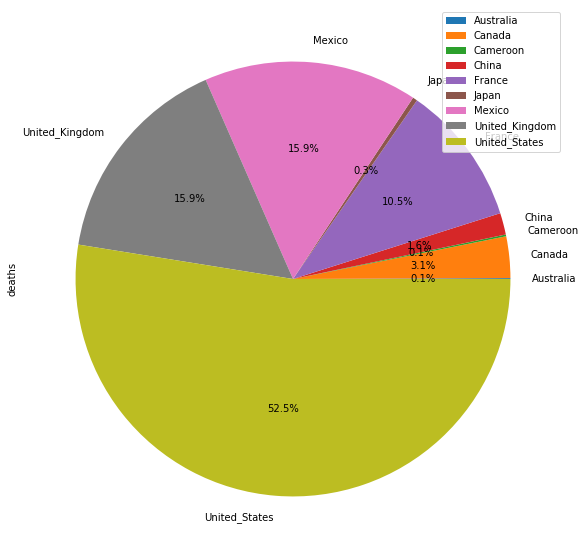

In [72]:
df11.plot(kind='pie',labels=['Australia', 'Canada', 'Cameroon', 'China', 'France', 'Japan', 'Mexico', 'United_Kingdom', 'United_States'], y='deaths', figsize=(20, 10), autopct='%1.1f%%')

## Out of the nine countries I have chosen to work with the US has the highest number of coronavirus death of 52.5% 

## Bar plot

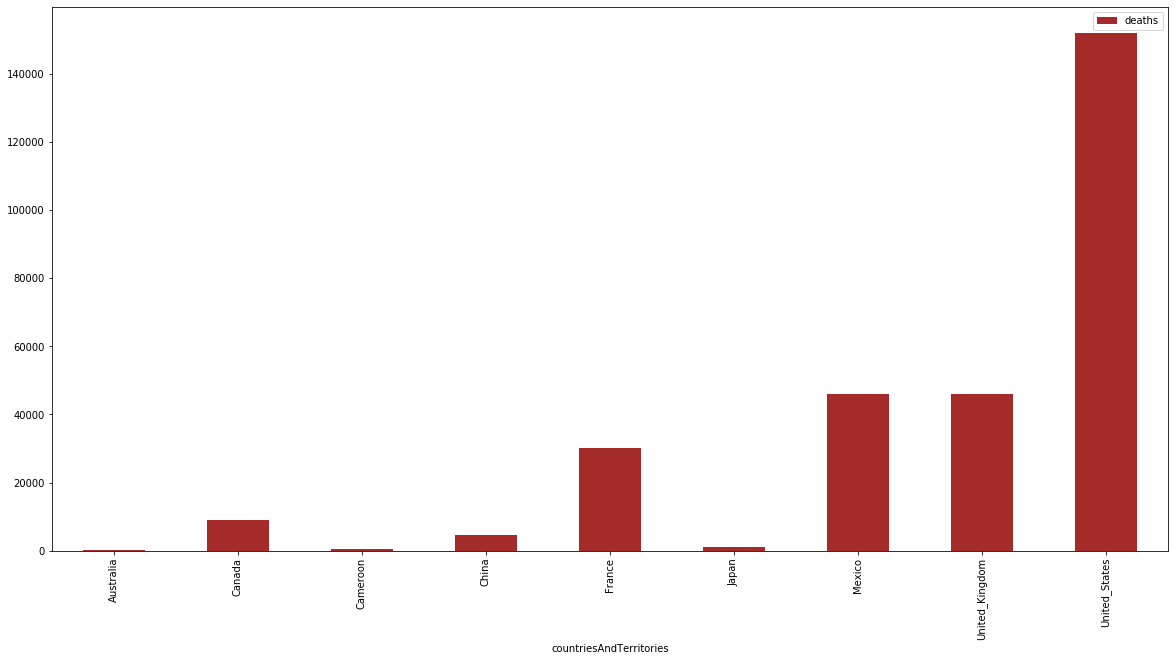

In [83]:
df11.plot(kind='bar',x='countriesAndTerritories',y='deaths', figsize=(20, 10), color='brown')

## The united has the highest number of death worldwide which stands at 152070 as of 07/31/2020

In [ ]:
## Covid 19 cases worldwide

In [74]:
df['cases'].sum()

17296303

## As of 07/30/2020, they are over 17million covid 19 cases worldwide

In [75]:
df12=df.loc[(df['continentExp']=='Africa')]
df13=df.loc[(df['continentExp']=='Asia')]
df14=df.loc[(df['continentExp']=='America')]
df15=df.loc[(df['continentExp']=='Europe')]
df16=df.loc[(df['continentExp']=='Ocerania')]
df17 =pd.concat([df12, df14, df13, df15, df16])
df17

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
349,31/07/2020,31,7,2020,602,14,Algeria,DZ,DZA,43053054.0,Africa,19.687337
350,30/07/2020,30,7,2020,614,12,Algeria,DZ,DZA,43053054.0,Africa,19.647851
351,29/07/2020,29,7,2020,642,11,Algeria,DZ,DZA,43053054.0,Africa,19.508488
352,28/07/2020,28,7,2020,616,8,Algeria,DZ,DZA,43053054.0,Africa,19.241376
353,27/07/2020,27,7,2020,593,9,Algeria,DZ,DZA,43053054.0,Africa,18.958005
...,...,...,...,...,...,...,...,...,...,...,...,...
31680,04/01/2020,4,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe,NaN
31681,03/01/2020,3,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe,NaN
31682,02/01/2020,2,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe,NaN
31683,01/01/2020,1,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe,NaN


In [76]:
d1 = {'continentExp':['Africa', 'America', 'Asia', 'Europe', 'Oceania'], 'deaths':[df12['deaths'].sum(), df14['deaths'].sum(), df13['deaths'].sum(), df15['deaths'].sum(), df16['deaths'].sum()], 'cases':  [df12['cases'].sum(), df14['cases'].sum(), df13['cases'].sum(), df15['cases'].sum(), df16['cases'].sum()]}

In [77]:
df17 = pd.DataFrame(d1)
df17

,continentExp,deaths,cases
0,Africa,19317,909735
1,America,355582,9338314
2,Asia,94230,4145531
3,Europe,203934,2883933
4,Oceania,0,0


## From my dataframe the continent of Oceania has not registered a single case of Covid-19 yet

## Pie chart

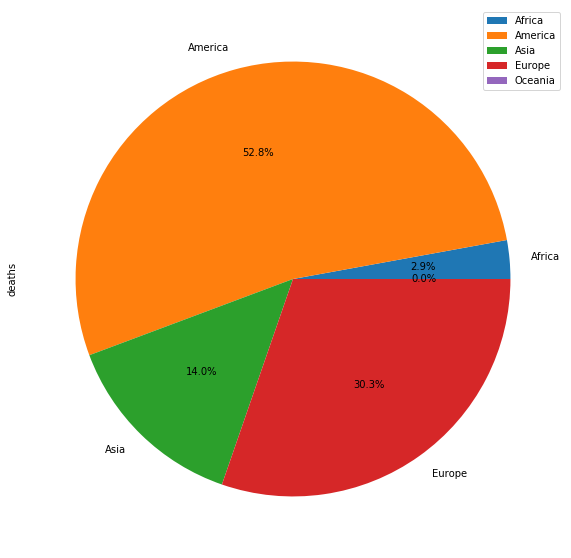

In [78]:
df17.plot(kind='pie',labels=['Africa', 'America', 'Asia', 'Europe', 'Oceania'], y='deaths', figsize=(20, 10), autopct='%1.1f%%')

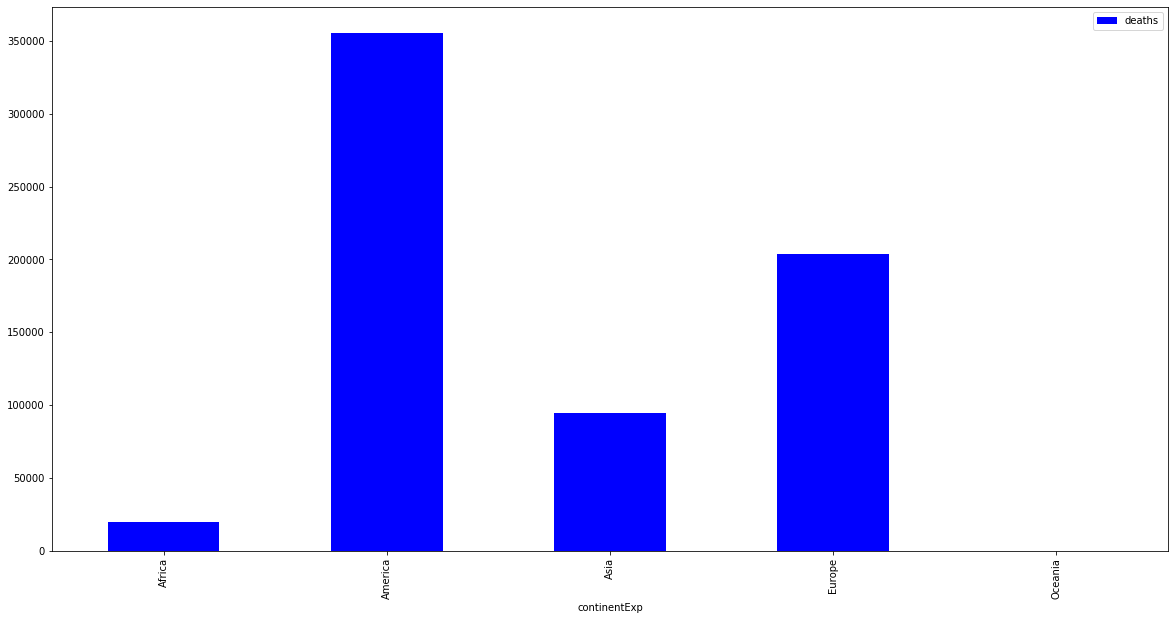

In [81]:
df17.plot(kind='bar',x='continentExp',y='deaths', figsize=(20, 10), color='blue')

## Comparing US response vs Canada response to coronavirus 

In [84]:
df18 = df.loc[df['year']==2020]
df19=df18.loc[df['countriesAndTerritories']=='United_States_of_America']
df20=df18.loc[df['countriesAndTerritories']=='Canada']
df21=df18.loc[df['countriesAndTerritories']=='United_Kingdom']

In [85]:
d11 = {'month': ['January', 'Febrauary', 'March', 'April', 'May', 'June', 'July'], 'deaths': [df19.loc[df19['month']==1]['deaths'].sum(),
                                                                                             df19.loc[df19['month']==2]['deaths'].sum(),
                                                                                             df19.loc[df19['month']==3]['deaths'].sum(),
                                                                                             df19.loc[df19['month']==4]['deaths'].sum(),
                                                                                             df19.loc[df19['month']==5]['deaths'].sum(),
                                                                                             df19.loc[df19['month']==6]['deaths'].sum(),
                                                                                             df19.loc[df19['month']==7]['deaths'].sum()]}
d12 = {'month': ['January', 'Febrauary', 'March', 'April', 'May', 'June', 'July'], 'deaths': [df20.loc[df20['month']==1]['deaths'].sum(),
                                                                                             df20.loc[df20['month']==2]['deaths'].sum(),
                                                                                             df20.loc[df20['month']==3]['deaths'].sum(),
                                                                                             df20.loc[df20['month']==4]['deaths'].sum(),
                                                                                             df20.loc[df20['month']==5]['deaths'].sum(),
                                                                                             df20.loc[df20['month']==6]['deaths'].sum(),
                                                                                             df20.loc[df20['month']==7]['deaths'].sum()]}
d13 = {'month': ['January', 'Febrauary', 'March', 'April', 'May', 'June', 'July'], 'deaths': [df21.loc[df21['month']==1]['deaths'].sum(),
       df21.loc[df21['month']==2]['deaths'].sum(), df21.loc[df21['month']==3]['deaths'].sum(), df21.loc[df21['month']==4]['deaths'].sum(), 
       df21.loc[df21['month']==5]['deaths'].sum(), df21.loc[df21['month']==6]['deaths'].sum(), df21.loc[df21['month']==7]['deaths'].sum()]}

In [86]:
df22 = pd.DataFrame(d11)
df23 = pd.DataFrame(d12)
df24 = pd.DataFrame(d13)

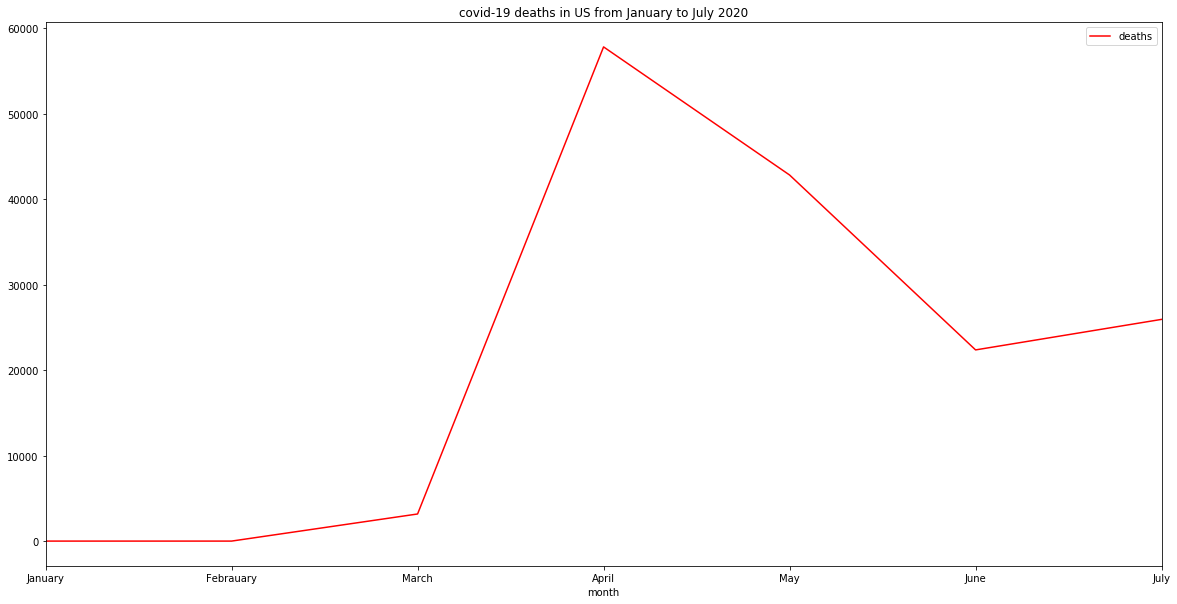

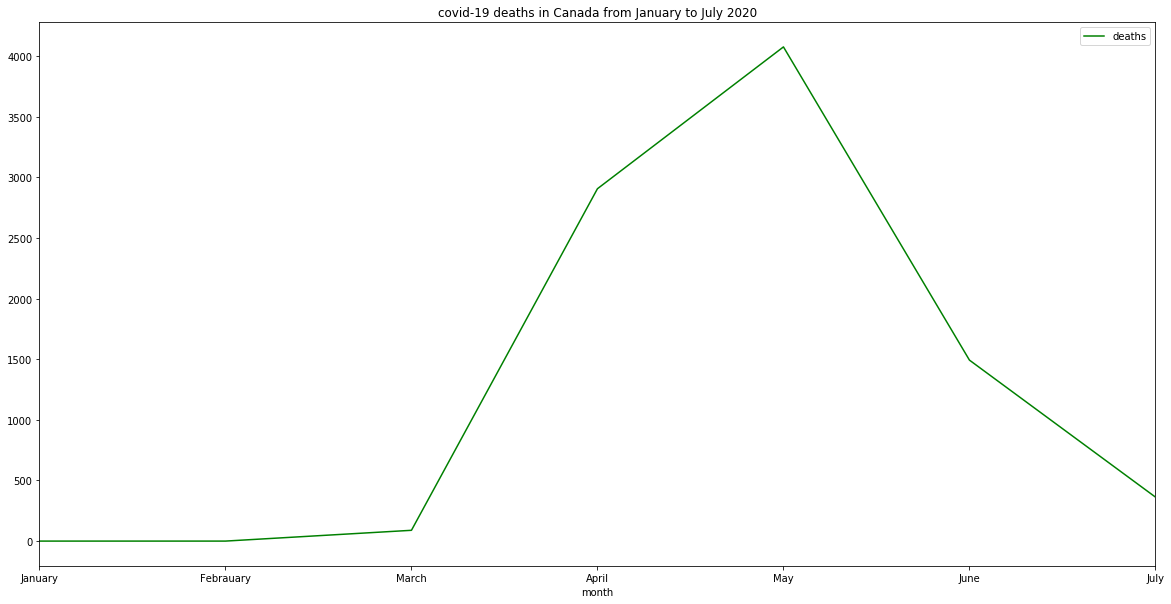

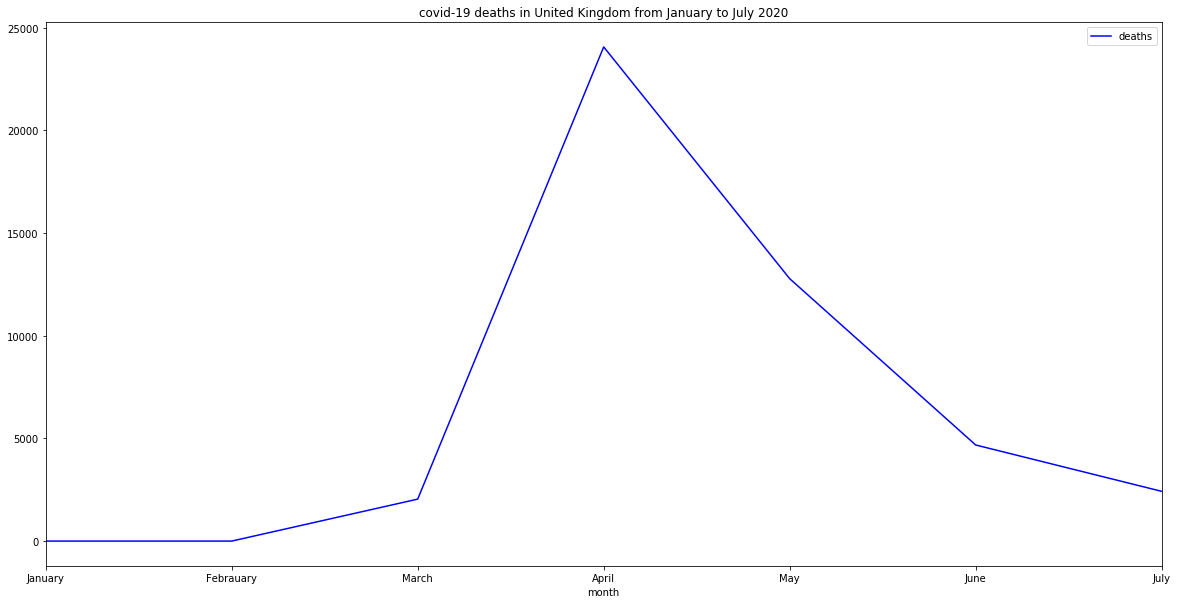

In [87]:
df22.plot(kind='line', x='month',y='deaths', color='red', figsize=(20,10), title='covid-19 deaths in US from January to July 2020')
df23.plot(kind='line', x='month', y='deaths', color='green', figsize=(20,10), title='covid-19 deaths in Canada from January to July 2020')
df24.plot(kind='line', x='month', y='deaths', color= 'blue', figsize=(20,10), title='covid-19 deaths in United Kingdom from January to July 2020')

## The last two line plots which represent Canada and United Kingdom respectively, clearly shows Canada had it highest number of deaths in May and Uk in April.
## From May up to present there has been a drastic drop in the death rate in Canada due to their effective and timely response to the virus. UK has witnessed a similar trend breginning from the month of April.
## The United_States had it highest death rate in April and later witnessed a drastic drop up to June. From June the death rate in the US has been increasing steadily up to present

In [89]:
Image(url= "https://i.cbc.ca/1.5554259.1588788406!/cpImage/httpImage/image.jpg_gen/derivatives/original_1180/covid-que-20200503.jpg")

## Prevention
## * Wash your hands
## * wear a mask
## * Practice social distancing



## COVID-19 is real, stay safe